In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, silhouette_visualizer

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [3]:
X = pd.read_csv('clustering.csv', header=None)

In [4]:
X.head()

,0,1
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


In [5]:
X.shape

(400, 2)

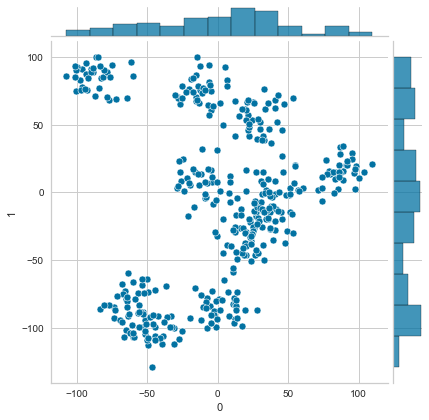

In [21]:
sns.jointplot(x=X.iloc[:, 0], y=X.iloc[:, 1], height=6, ratio=10)
plt.show()

## K-means clustering

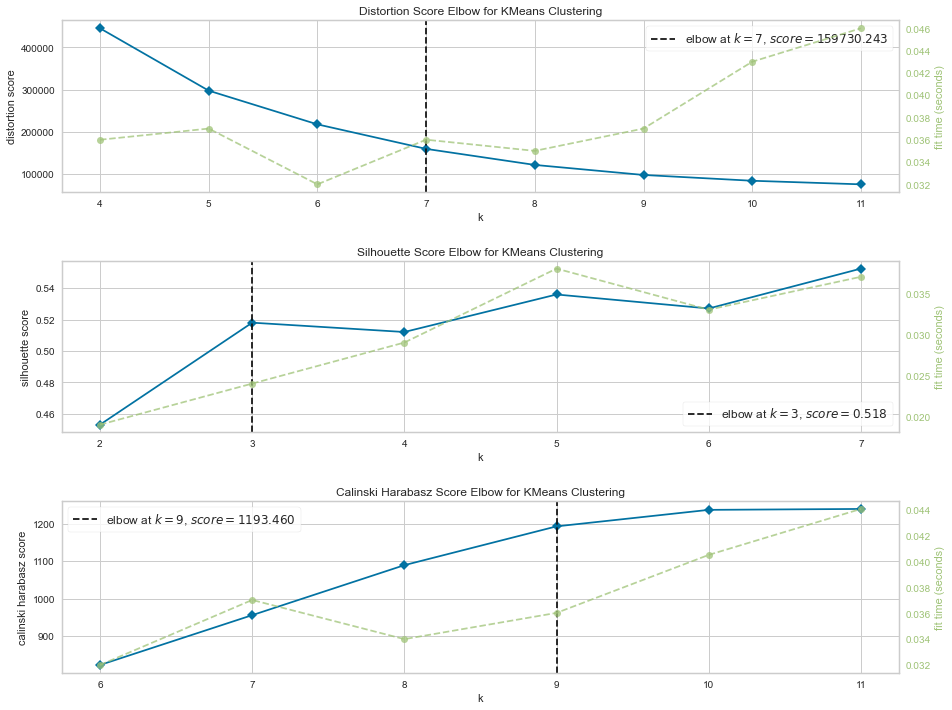

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
sns.set_style("whitegrid")

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(4, 12), ax=axes[0])
visualizer.fit(X)
visualizer.finalize()

visualizer = KElbowVisualizer(kmeans, k=(2, 8), ax=axes[1], metric='silhouette')
visualizer.fit(X)
visualizer.finalize()

visualizer = KElbowVisualizer(kmeans, k=(6, 12), ax=axes[2], metric='calinski_harabasz')
visualizer.fit(X)
visualizer.finalize()

plt.subplots_adjust(hspace=0.4)
visualizer.finalize()

Opitmal number of clusters depends on the metric used to determine the elbow score.

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

kmeans1 = KMeans(n_clusters=7, random_state=0).fit(X)
y_kmeans1 = kmeans1.predict(X)
centers1 = kmeans1.cluster_centers_

kmeans2 = KMeans(n_clusters=9, random_state=0).fit(X)
y_kmeans2 = kmeans2.predict(X)
centers2 = kmeans2.cluster_centers_

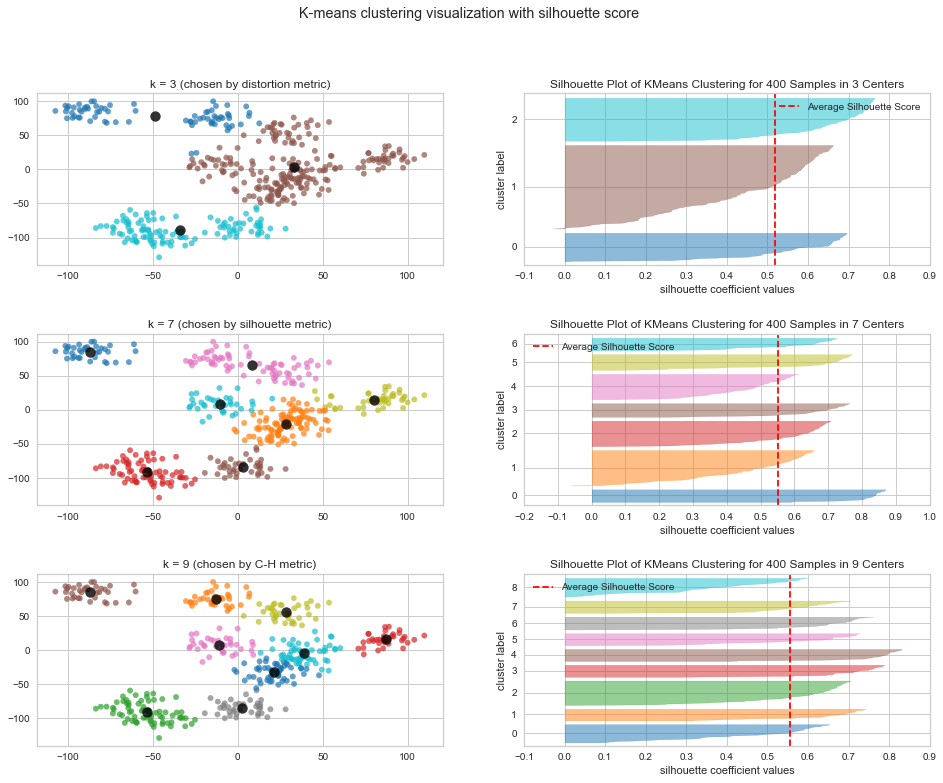

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle("K-means clustering visualization with silhouette score")


axes[0][0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=30, cmap='tab10', alpha=0.7)
axes[0][0].scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8)
axes[0][0].set_title('k = 3 (chosen by distortion metric)')

viz = SilhouetteVisualizer(kmeans, colors='tab10', ax=axes[0][1]).fit(X)
viz.finalize()

axes[1][0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans1, s=30, cmap='tab10', alpha=0.7)
axes[1][0].scatter(centers1[:, 0], centers1[:, 1], c='black', s=100, alpha=0.8)
axes[1][0].set_title('k = 7 (chosen by silhouette metric)')


viz = SilhouetteVisualizer(kmeans1, colors='tab10', ax=axes[1][1]).fit(X)
viz.finalize()


axes[2][0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans2, s=30, cmap='tab10', alpha=0.7)
axes[2][0].scatter(centers2[:, 0], centers2[:, 1], c='black', s=100, alpha=0.8)
axes[2][0].set_title('k = 9 (chosen by C-H metric)')

viz = SilhouetteVisualizer(kmeans2, colors='tab10', ax=axes[2][1]).fit(X)
viz.finalize()

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.4)
plt.show()

After analyzing the plots, we can conlude that from the three k values chosen by different metrics, k = 9 does the best. The average silhouette score is the highest and clusters look the most balanced. For example for k = 3, the bronze cluster is too big and there is the same problem for k = 7 for orange and pink clusters.

## Agglomerative clustering

In [47]:
agglo = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)

In [48]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

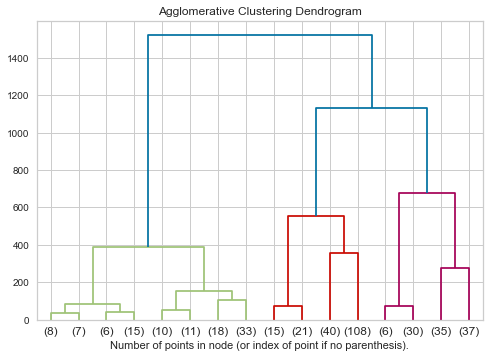

In [49]:
plt.title('Agglomerative Clustering Dendrogram')

plot_dendrogram(agglo, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Agglomerative clustering split data into 3 clusters.

Text(0.5, 1.0, 'k = 3 (agglomerative clustering)')

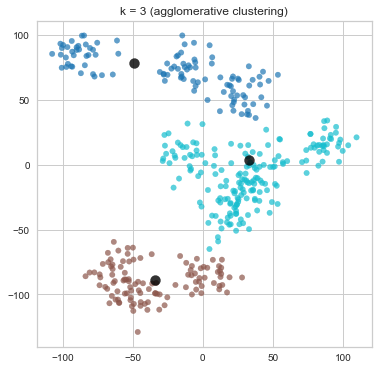

In [68]:
agglo = agglo = AgglomerativeClustering(n_clusters=3).fit(X)

fig, axes = plt.subplots(figsize=(6, 6))

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agglo.labels_, s=30, cmap='tab10', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8)
plt.title('k = 3 (agglomerative clustering)')

These clusters differ a bit from 3-Means clustering, for example the bottom part of dark blue cluster.